In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

## Q1

In [79]:
df=pd.read_csv('german_credit_data.csv')
df=df.drop('Unnamed: 0',axis=1)

In [80]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


## Q2

In [81]:
df.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,NaN,NaN,9055,36,education,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


In [82]:
df.tail(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
990,37,male,1,own,NaN,NaN,3565,12,education,good
991,34,male,1,own,moderate,NaN,1569,15,radio/TV,good
992,23,male,1,rent,NaN,little,1936,18,radio/TV,good
993,30,male,3,own,little,little,3959,36,furniture/equipment,good
994,50,male,2,own,NaN,NaN,2390,12,car,good
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,27,male,2,own,moderate,moderate,4576,45,car,good


In [83]:
df.sample(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
829,38,male,2,free,NaN,moderate,6681,48,business,good
515,37,female,2,own,little,little,609,6,car,good
73,41,female,1,own,little,moderate,5954,42,business,good
263,57,female,1,free,little,NaN,2748,12,education,good
450,30,male,3,own,NaN,NaN,11054,36,car,good
246,52,male,2,own,little,NaN,717,12,radio/TV,good
670,27,male,1,own,moderate,NaN,4139,24,business,good
187,68,male,0,free,little,moderate,1175,16,car,good
958,45,male,1,own,little,little,4006,28,car,bad
60,27,male,2,own,little,moderate,1391,9,business,good


## Q3

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [85]:
df['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [86]:
df['Saving accounts'].isnull().sum()

183

In [87]:
df[df['Saving accounts'].isnull() & df['Checking account'].isnull() ]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
5,35,male,1,free,NaN,NaN,9055,36,education,good
16,53,male,2,own,NaN,NaN,2424,24,radio/TV,good
24,26,male,2,own,NaN,NaN,2069,10,furniture/equipment,good
33,57,male,1,rent,NaN,NaN,1264,12,business,good
53,31,male,2,own,NaN,NaN,3378,18,car,good
...,...,...,...,...,...,...,...,...,...,...
947,38,male,3,own,NaN,NaN,2859,12,car,good
962,29,male,2,own,NaN,NaN,3556,15,car,good
968,29,male,2,rent,NaN,NaN,7166,42,radio/TV,good
990,37,male,1,own,NaN,NaN,3565,12,education,good


In [88]:
df= df.fillna('unknown')

In [89]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,unknown,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,unknown,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,unknown,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,unknown,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [90]:
df['Risk'] = df['Risk'].replace(['good','bad'],[1,0])
df


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,unknown,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,unknown,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,0
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,unknown,1736,12,furniture/equipment,1
996,40,male,3,own,little,little,3857,30,car,1
997,38,male,2,own,little,unknown,804,12,radio/TV,1
998,23,male,2,free,little,little,1845,45,radio/TV,0


In [91]:
df=pd.get_dummies(df,drop_first=True)
df

,Age,Job,Credit amount,Duration,Risk,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,...,Checking account_moderate,Checking account_rich,Checking account_unknown,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,1169,6,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,22,2,5951,48,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,49,1,2096,12,1,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,45,2,7882,42,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,53,2,4870,24,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1736,12,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
996,40,3,3857,30,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
997,38,2,804,12,1,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
998,23,2,1845,45,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [92]:
df['Label']=df['Risk']
df=df.drop('Risk',axis=1)
df

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,...,Checking account_rich,Checking account_unknown,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Label
0,67,2,1169,6,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,22,2,5951,48,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,49,1,2096,12,1,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,45,2,7882,42,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,53,2,4870,24,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1736,12,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
996,40,3,3857,30,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
997,38,2,804,12,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
998,23,2,1845,45,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Q4

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Age                          1000 non-null   int64
 1   Job                          1000 non-null   int64
 2   Credit amount                1000 non-null   int64
 3   Duration                     1000 non-null   int64
 4   Sex_male                     1000 non-null   uint8
 5   Housing_own                  1000 non-null   uint8
 6   Housing_rent                 1000 non-null   uint8
 7   Saving accounts_moderate     1000 non-null   uint8
 8   Saving accounts_quite rich   1000 non-null   uint8
 9   Saving accounts_rich         1000 non-null   uint8
 10  Saving accounts_unknown      1000 non-null   uint8
 11  Checking account_moderate    1000 non-null   uint8
 12  Checking account_rich        1000 non-null   uint8
 13  Checking account_unknown     1000 non-null   uint

In [94]:
df.describe()

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,...,Checking account_rich,Checking account_unknown,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Label
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000,0.690000,0.713000,0.179000,0.103000,0.063000,0.048000,...,0.063000,0.394000,0.337000,0.01200,0.059000,0.181000,0.280000,0.022000,0.01200,0.700000
std,11.375469,0.653614,2822.736876,12.058814,0.462725,0.452588,0.383544,0.304111,0.243085,0.213873,...,0.243085,0.488879,0.472921,0.10894,0.235743,0.385211,0.449224,0.146757,0.10894,0.458487
min,19.000000,0.000000,250.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,27.000000,2.000000,1365.500000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,33.000000,2.000000,2319.500000,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
75%,42.000000,2.000000,3972.250000,24.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000
max,75.000000,3.000000,18424.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


## Q5

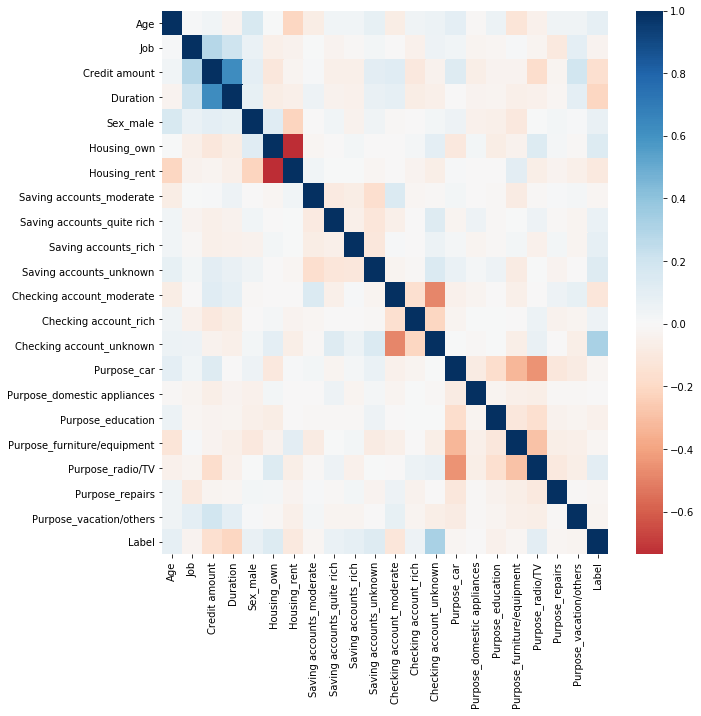

In [95]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='RdBu',center=0)

In [96]:
interest_feature=['Credit amount','Duration','Housing_own','Housing_rent','Purpose_radio/TV','Purpose_car']

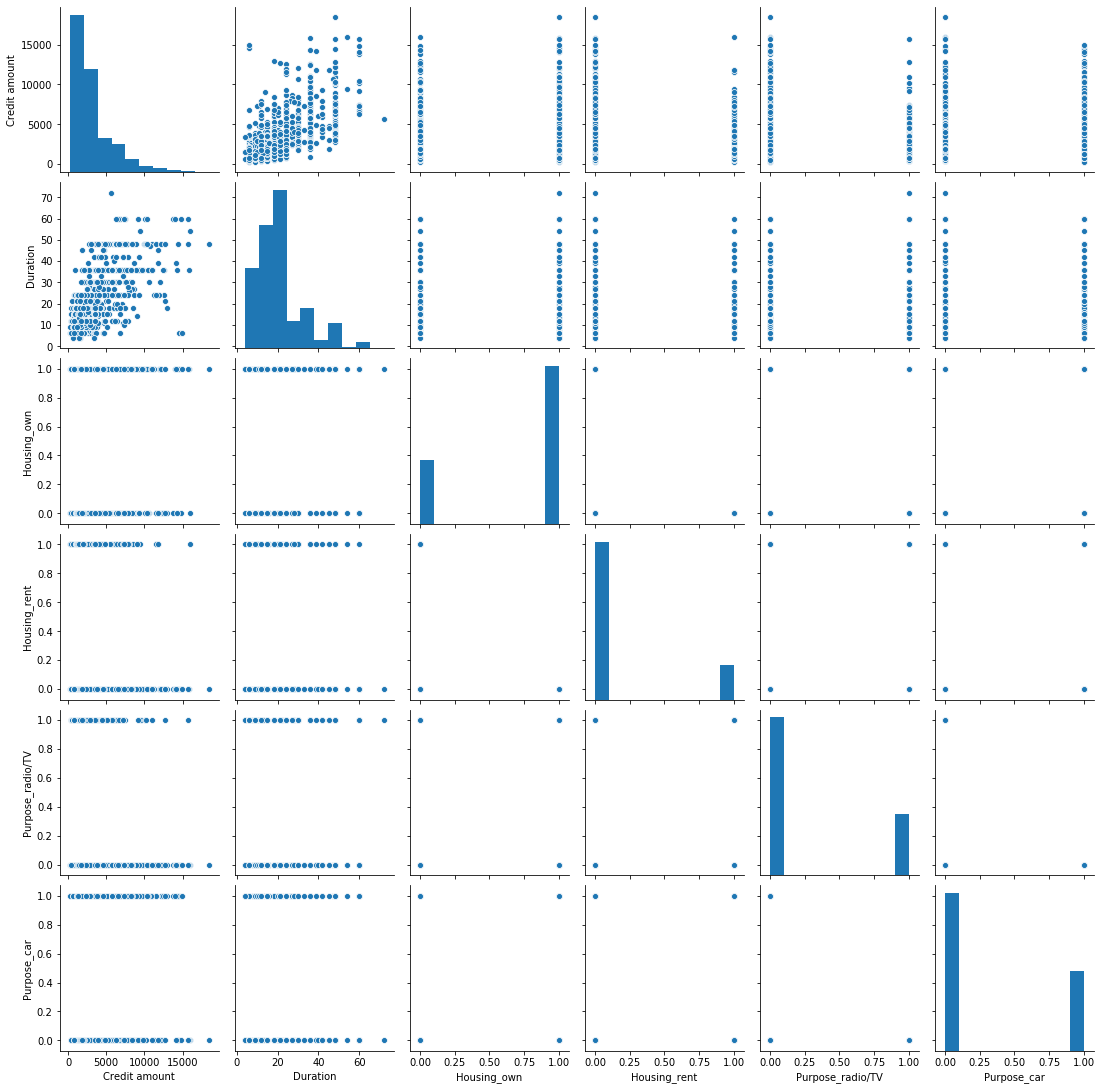

In [97]:
sns.pairplot(df[interest_feature])

## Q6

Text(0.5, 1.0, 'Age')

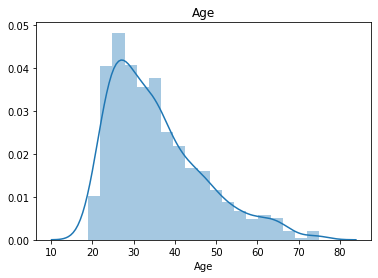

In [98]:
sns.distplot(a=df['Age'])
plt.title('Age')



Text(0.5, 1.0, 'Credit amount')

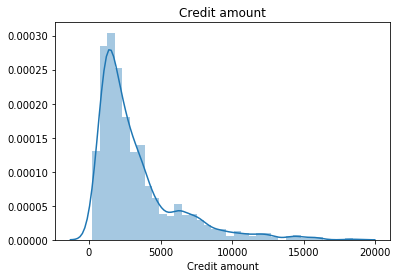

In [99]:
sns.distplot(a=df['Credit amount'])
plt.title('Credit amount')

Text(0.5, 1.0, 'Duration')

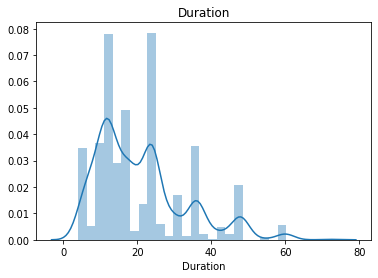

In [100]:
sns.distplot(a=df['Duration'])
plt.title('Duration')

## Q7

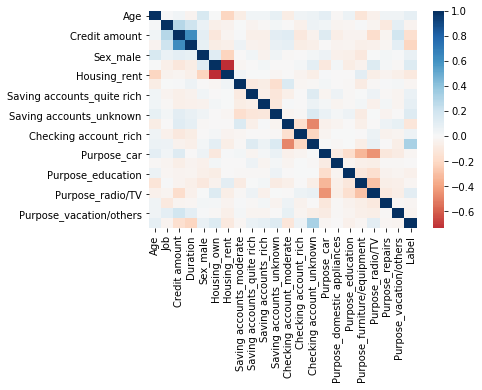

In [101]:
sns.heatmap(df.corr(),cmap='RdBu',center=0)

## Q8

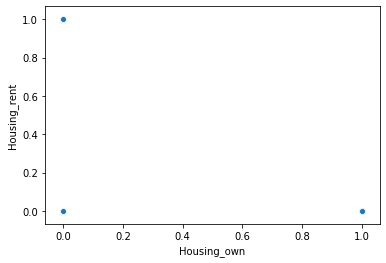

In [102]:
sns.scatterplot(x='Housing_own',y='Housing_rent',data=df)

## Q9

In [103]:
df.corr()

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,...,Checking account_rich,Checking account_unknown,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Label
Age,1.000000,0.015673,0.032716,-0.036136,0.161694,0.006553,-0.212620,-0.075302,0.030988,0.032007,...,0.037504,0.062436,0.099919,-0.012562,0.060390,-0.127657,-0.046401,0.039567,0.042365,0.091127
Job,0.015673,1.000000,0.285385,0.210910,0.070298,-0.059393,-0.039195,0.004472,-0.037499,-0.017128,...,-0.050099,0.052704,0.036762,-0.025979,-0.021672,0.013422,-0.027683,-0.092751,0.100544,-0.032735
Credit amount,0.032716,0.285385,1.000000,0.624984,0.093482,-0.117497,-0.024611,0.013546,-0.064256,-0.055542,...,-0.100510,-0.039485,0.125575,-0.069268,-0.034796,-0.034037,-0.173203,-0.028875,0.192893,-0.154739
Duration,-0.036136,0.210910,0.624984,1.000000,0.081432,-0.075169,-0.064417,0.051587,-0.040257,-0.048261,...,-0.076455,-0.063467,-0.005320,-0.037212,-0.025450,-0.062804,-0.044319,-0.022549,0.104516,-0.214927
Sex_male,0.161694,0.070298,0.093482,0.081432,1.000000,0.119638,-0.222845,-0.000498,0.031414,-0.041673,...,-0.004183,0.027169,0.047893,-0.045275,-0.052397,-0.100467,0.008668,0.026828,0.014297,0.075493
Housing_own,0.006553,-0.059393,-0.117497,-0.075169,0.119638,1.000000,-0.735968,-0.017738,0.000737,0.028707,...,0.018934,0.104407,-0.099526,0.029317,-0.075684,-0.040496,0.134705,0.019803,-0.011288,0.134589
Housing_rent,-0.212620,-0.039195,-0.024611,-0.064417,-0.222845,-0.735968,1.000000,0.030578,0.007762,0.004979,...,-0.035183,-0.066870,0.014773,-0.003546,-0.006211,0.105700,-0.070414,-0.034465,-0.051460,-0.092785
Saving accounts_moderate,-0.075302,0.004472,0.013546,0.051587,-0.000498,-0.017738,0.030578,1.000000,-0.087866,-0.076089,...,-0.020162,-0.010651,0.029852,-0.007131,-0.015038,-0.082398,-0.013482,0.016463,0.023084,-0.022255
Saving accounts_quite rich,0.030988,-0.037499,-0.064256,-0.040257,0.031414,0.000737,0.007762,-0.087866,1.000000,-0.058224,...,0.000525,0.127847,-0.028134,0.047023,-0.012524,0.006382,0.049134,-0.010831,-0.028577,0.070954
Saving accounts_rich,0.032007,-0.017128,-0.055542,-0.048261,-0.041673,0.028707,0.004979,-0.076089,-0.058224,1.000000,...,-0.000462,0.058284,0.018052,-0.024747,-0.016518,0.028091,-0.046259,0.030106,-0.024747,0.085749


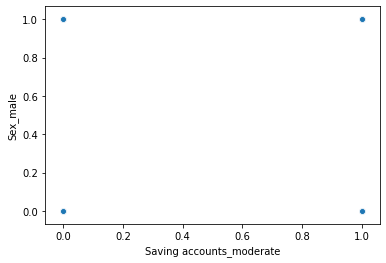

In [104]:
sns.scatterplot(x='Saving accounts_moderate',y='Sex_male',data=df)


## Q10

(array([ 22.,   0.,   0., 200.,   0.,   0., 630.,   0.,   0., 148.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

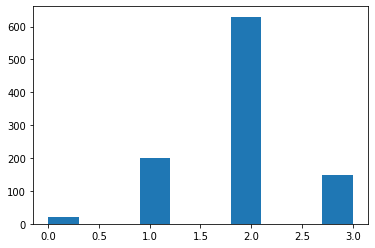

In [105]:
plt.hist(data=df, x="Job")

## Q11

Text(0.5, 1.0, 'Mg')

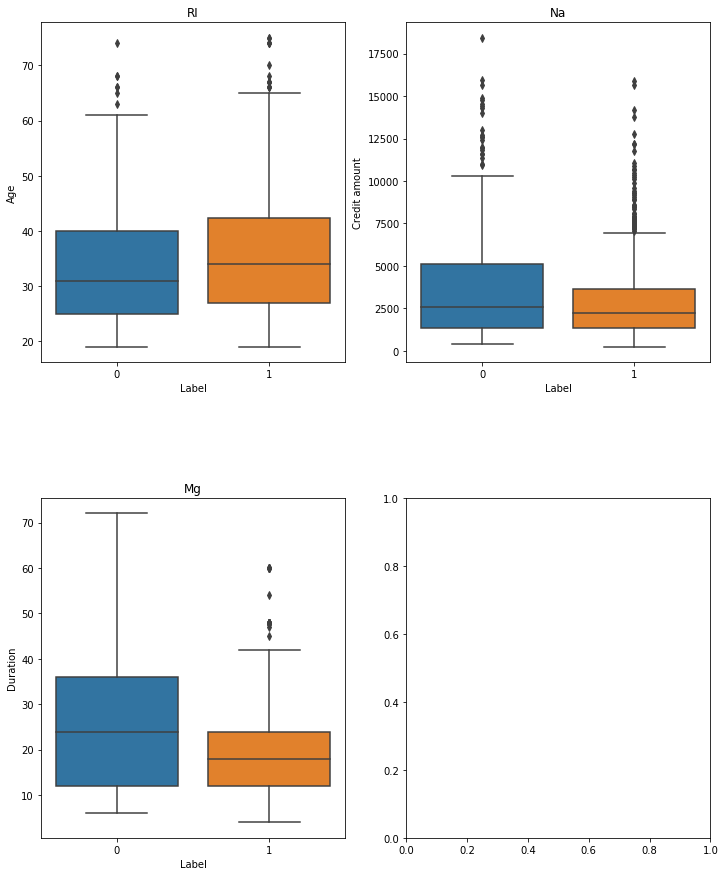

In [106]:
fig, axs = plt.subplots(2, 2,figsize=(12, 15),gridspec_kw={'hspace':0.4, 'wspace': 0.2})
sns.boxplot(ax=axs[0,0],x='Label', y='Age', data=df)
axs[0, 0].set_title('RI')
sns.boxplot(ax=axs[0,1],x='Label', y='Credit amount', data=df)
axs[0, 1].set_title('Na')
sns.boxplot(ax=axs[1,0],x='Label', y='Duration', data=df)
axs[1, 0].set_title('Mg')

## Q12

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df.drop(['Label'],axis=1),df['Label'], test_size=0.3,random_state=99)

In [108]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 21)
(300, 21)
(700,)
(300,)


## Q13

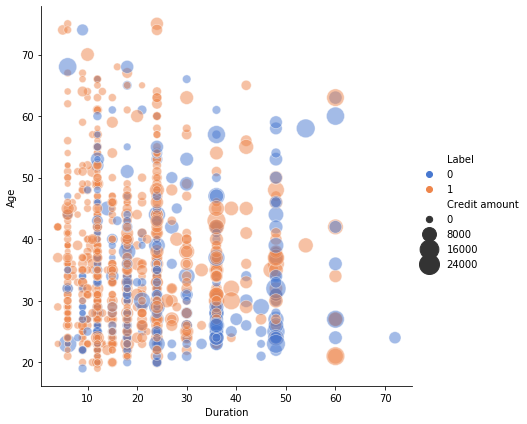

In [109]:
sns.relplot(x="Duration", y="Age", hue="Label", size="Credit amount",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

## Q14

from quiz 15 we should use normalization instead of standardization

## Q15

#### 1. Normalization

In [110]:
min_max_scaler=MinMaxScaler()
df_minmax=min_max_scaler.fit_transform(df.drop(['Label'],axis=1))
df_minmax

array([[0.85714286, 0.66666667, 0.05056674, ..., 1.        , 0.        ,
        0.        ],
       [0.05357143, 0.66666667, 0.31368989, ..., 1.        , 0.        ,
        0.        ],
       [0.53571429, 0.33333333, 0.10157368, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.33928571, 0.66666667, 0.03048311, ..., 1.        , 0.        ,
        0.        ],
       [0.07142857, 0.66666667, 0.08776274, ..., 1.        , 0.        ,
        0.        ],
       [0.14285714, 0.66666667, 0.23803235, ..., 0.        , 0.        ,
        0.        ]])

In [111]:
norm_df=pd.DataFrame(df_minmax,columns=df.columns[:-1])
norm_df

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,...,Checking account_moderate,Checking account_rich,Checking account_unknown,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0.857143,0.666667,0.050567,0.029412,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.053571,0.666667,0.313690,0.647059,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.535714,0.333333,0.101574,0.117647,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.464286,0.666667,0.419941,0.558824,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.607143,0.666667,0.254209,0.294118,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.214286,0.333333,0.081765,0.117647,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
996,0.375000,1.000000,0.198470,0.382353,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.339286,0.666667,0.030483,0.117647,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
998,0.071429,0.666667,0.087763,0.602941,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [112]:
X_train,X_test,y_train,y_test=train_test_split(norm_df,
                                              df['Label'],
                                              test_size=0.3,
                                              random_state=99)

In [113]:
dtree14_1=DecisionTreeClassifier()
dtree14_1.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [114]:
predicted14_1=dtree14_1.predict(X_test)

In [115]:
confusion_matrix(y_test,predicted14_1)

array([[ 39,  45],
       [ 51, 165]], dtype=int64)

In [116]:
print('Accuracy=',accuracy_score(y_test,predicted14_1))
print('F1 score=',f1_score(y_test,predicted14_1))
print('Precision=',precision_score(y_test,predicted14_1))
print('Recall=',recall_score(y_test,predicted14_1))

Accuracy= 0.68
F1 score= 0.7746478873239437
Precision= 0.7857142857142857
Recall= 0.7638888888888888


In [118]:
norm_f1=f1_score(y_test,predicted14_1)
norm_recall=recall_score(y_test,predicted14_1)
norm_acc=accuracy_score(y_test,predicted14_1)
print(norm_f1)
print(norm_recall)
print(norm_acc)

0.7746478873239437
0.7638888888888888
0.68


#### 2. Standardization

In [119]:
sc=StandardScaler()

In [120]:
df_scale=sc.fit_transform(df.drop(['Label'],axis=1))
df_scale

array([[ 2.76645648,  0.14694918, -0.74513141, ...,  1.60356745,
        -0.14998296, -0.11020775],
       [-1.19140394,  0.14694918,  0.94981679, ...,  1.60356745,
        -0.14998296, -0.11020775],
       [ 1.18331231, -1.38377145, -0.41656241, ..., -0.62360956,
        -0.14998296, -0.11020775],
       ...,
       [ 0.21583532,  0.14694918, -0.87450324, ...,  1.60356745,
        -0.14998296, -0.11020775],
       [-1.10345149,  0.14694918, -0.50552769, ...,  1.60356745,
        -0.14998296, -0.11020775],
       [-0.75164167,  0.14694918,  0.46245715, ..., -0.62360956,
        -0.14998296, -0.11020775]])

In [121]:
sc_df=pd.DataFrame(df_scale,columns=df.columns[:-1])
sc_df

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,...,Checking account_moderate,Checking account_rich,Checking account_unknown,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,2.766456,0.146949,-0.745131,-1.236478,0.670280,0.634448,-0.466933,-0.338862,-0.259299,-0.224544,...,-0.606621,-0.259299,-0.806328,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
1,-1.191404,0.146949,0.949817,2.248194,-1.491914,0.634448,-0.466933,-0.338862,-0.259299,-0.224544,...,1.648476,-0.259299,-0.806328,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
2,1.183312,-1.383771,-0.416562,-0.738668,0.670280,0.634448,-0.466933,-0.338862,-0.259299,-0.224544,...,-0.606621,-0.259299,1.240190,-0.712949,-0.110208,3.993639,-0.470108,-0.623610,-0.149983,-0.110208
3,0.831502,0.146949,1.634247,1.750384,0.670280,-1.576173,-0.466933,-0.338862,-0.259299,-0.224544,...,-0.606621,-0.259299,-0.806328,-0.712949,-0.110208,-0.250398,2.127172,-0.623610,-0.149983,-0.110208
4,1.535122,0.146949,0.566664,0.256953,0.670280,-1.576173,-0.466933,-0.338862,-0.259299,-0.224544,...,-0.606621,-0.259299,-0.806328,1.402626,-0.110208,-0.250398,-0.470108,-0.623610,-0.149983,-0.110208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.399832,-1.383771,-0.544162,-0.738668,-1.491914,0.634448,-0.466933,-0.338862,-0.259299,-0.224544,...,-0.606621,-0.259299,1.240190,-0.712949,-0.110208,-0.250398,2.127172,-0.623610,-0.149983,-0.110208
996,0.391740,1.677670,0.207612,0.754763,0.670280,0.634448,-0.466933,-0.338862,-0.259299,-0.224544,...,-0.606621,-0.259299,-0.806328,1.402626,-0.110208,-0.250398,-0.470108,-0.623610,-0.149983,-0.110208
997,0.215835,0.146949,-0.874503,-0.738668,0.670280,0.634448,-0.466933,-0.338862,-0.259299,-0.224544,...,-0.606621,-0.259299,1.240190,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
998,-1.103451,0.146949,-0.505528,1.999289,0.670280,-1.576173,-0.466933,-0.338862,-0.259299,-0.224544,...,-0.606621,-0.259299,-0.806328,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208


In [122]:
X_train,X_test,y_train,y_test=train_test_split(sc_df,
                                              df['Label'],
                                              test_size=0.3,
                                              random_state=99)

In [123]:
dtree14_2=DecisionTreeClassifier()
dtree14_2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [124]:
predicted14_2=dtree14_2.predict(X_test)

In [125]:
predicted14_2=dtree14_2.predict(X_test)

In [126]:
confusion_matrix(y_test,predicted14_2)

array([[ 39,  45],
       [ 50, 166]], dtype=int64)

In [50]:
print('Accuracy=',accuracy_score(y_test,predicted14_2))
print('F1 score=',f1_score(y_test,predicted14_2))
print('Precision=',precision_score(y_test,predicted14_2))
print('Recall=',recall_score(y_test,predicted14_2))

Accuracy= 0.6666666666666666
F1 score= 0.7652582159624414
Precision= 0.7761904761904762
Recall= 0.7546296296296297


In [127]:
sc_f1=f1_score(y_test,predicted14_2)
sc_recall=recall_score(y_test,predicted14_2)
sc_acc=accuracy_score(y_test,predicted14_2)
print(sc_f1)
print(sc_recall)
print(sc_acc)

0.7775175644028103
0.7685185185185185
0.6833333333333333


## Q16

In [128]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('Label',axis=1),
                                              df['Label'],
                                              test_size=0.3,
                                              random_state=99)

In [129]:
dtree16_1=DecisionTreeClassifier()
dtree16_1.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [130]:
predicted16_1=dtree16_1.predict(X_test)

In [131]:
confusion_matrix(y_test,predicted16_1)

array([[ 38,  46],
       [ 50, 166]], dtype=int64)

In [132]:
print('Accuracy=',accuracy_score(y_test,predicted16_1))
print('F1 score=',f1_score(y_test,predicted16_1))
print('Precision=',precision_score(y_test,predicted16_1))
print('Recall=',recall_score(y_test,predicted16_1))

Accuracy= 0.68
F1 score= 0.7757009345794392
Precision= 0.7830188679245284
Recall= 0.7685185185185185


In [133]:
default_f1=f1_score(y_test,predicted16_1)
default_recall=recall_score(y_test,predicted16_1)
default_acc=accuracy_score(y_test,predicted16_1)
print(default_f1)
print(default_recall)
print(default_acc)

0.7757009345794392
0.7685185185185185
0.68


## Q17

In [134]:
param_combination={'max_depth':[4,8,16,32,64], 'min_samples_leaf':[1,2,4,8,16]}

In [135]:
grid_search=GridSearchCV(DecisionTreeClassifier(),param_combination,verbose=3)

In [136]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.671, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.693, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.650, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.607, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.636, total=   0.0s
[CV] max_depth=4, min_samples_leaf=2 .................................
[CV] ..... max_depth=4, min_samples_leaf=2, score=0.679, total=   0.0s
[CV] max_depth=4, min_samples_leaf=2 .................................
[CV] ..... max_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] max_depth=16, min_samples_leaf=1 ................................
[CV] .... max_depth=16, min_samples_leaf=1, score=0.707, total=   0.0s
[CV] max_depth=16, min_samples_leaf=2 ................................
[CV] .... max_depth=16, min_samples_leaf=2, score=0.593, total=   0.0s
[CV] max_depth=16, min_samples_leaf=2 ................................
[CV] .... max_depth=16, min_samples_leaf=2, score=0.686, total=   0.0s
[CV] max_depth=16, min_samples_leaf=2 ................................
[CV] .... max_depth=16, min_samples_leaf=2, score=0.636, total=   0.0s
[CV] max_depth=16, min_samples_leaf=2 ................................
[CV] .... max_depth=16, min_samples_leaf=2, score=0.629, total=   0.0s
[CV] max_depth=16, min_samples_leaf=2 ................................
[CV] .... max_depth=16, min_samples_leaf=2, score=0.679, total=   0.0s
[CV] max_depth=16, min_samples_leaf=4 ................................
[CV] .... max_depth=16, min_samples_leaf=4, score=0.621, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 8, 16, 32, 64],
                 

In [137]:
grid_search.best_params_

{'max_depth': 8, 'min_samples_leaf': 16}

In [138]:
grid_predicted=grid_search.predict(X_test)

In [139]:
confusion_matrix(y_test,grid_predicted)

array([[ 50,  34],
       [ 31, 185]], dtype=int64)

In [140]:
print('Accuracy=',accuracy_score(y_test,grid_predicted))
print('F1 score=',f1_score(y_test,grid_predicted))
print('Precision=',precision_score(y_test,grid_predicted))
print('Recall=',recall_score(y_test,grid_predicted))

Accuracy= 0.7833333333333333
F1 score= 0.8505747126436781
Precision= 0.8447488584474886
Recall= 0.8564814814814815


In [141]:
grid_f1=f1_score(y_test,grid_predicted)
grid_recall=recall_score(y_test,grid_predicted)
grid_acc=accuracy_score(y_test,grid_predicted)
print(grid_f1)
print(grid_recall)
print(grid_acc)

0.8505747126436781
0.8564814814814815
0.7833333333333333


## Q18

In [142]:
df.columns

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Sex_male', 'Housing_own',
       'Housing_rent', 'Saving accounts_moderate',
       'Saving accounts_quite rich', 'Saving accounts_rich',
       'Saving accounts_unknown', 'Checking account_moderate',
       'Checking account_rich', 'Checking account_unknown', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others', 'Label'],
      dtype='object')

In [143]:
some_df=df[['Age','Duration', 'Sex_male', 'Housing_own',
       'Housing_rent', 'Saving accounts_moderate',
       'Saving accounts_quite rich', 'Saving accounts_rich',
       'Saving accounts_unknown', 'Checking account_moderate',
       'Checking account_rich', 'Checking account_unknown', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others']]
some_df

,Age,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Saving accounts_unknown,Checking account_moderate,Checking account_rich,Checking account_unknown,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,6,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,22,48,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,49,12,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,45,42,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,53,24,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,12,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
996,40,30,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
997,38,12,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
998,23,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [144]:
X_train,X_test,y_train,y_test=train_test_split(some_df,
                                              df['Label'],
                                              test_size=0.3,
                                              random_state=99)

In [145]:
dtree18_1=DecisionTreeClassifier()
dtree18_1.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [146]:
predicted18_1=dtree18_1.predict(X_test)

In [147]:
confusion_matrix(y_test,predicted18_1)

array([[ 41,  43],
       [ 46, 170]], dtype=int64)

In [148]:
print('Accuracy=',accuracy_score(y_test,predicted18_1))
print('F1 score=',f1_score(y_test,predicted18_1))
print('Precision=',precision_score(y_test,predicted18_1))
print('Recall=',recall_score(y_test,predicted18_1))

Accuracy= 0.7033333333333334
F1 score= 0.7925407925407926
Precision= 0.7981220657276995
Recall= 0.7870370370370371


In [149]:
some_f1=f1_score(y_test,predicted18_1)
some_recall=recall_score(y_test,predicted18_1)
print(some_f1)
print(some_recall)

print(default_f1)
print(default_recall)

0.7925407925407926
0.7870370370370371
0.7757009345794392
0.7685185185185185


some feature without 'Job', 'Credit amount' columns is better than all feature

## Q19

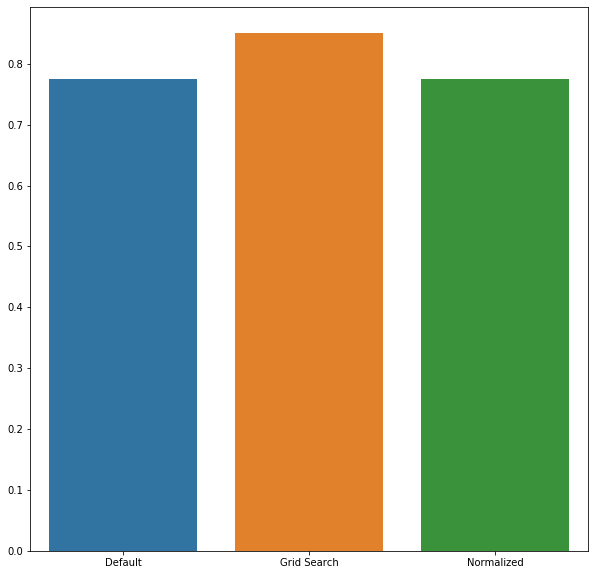

In [150]:
fig=plt.figure(figsize=(10,10))
point=['Default','Grid Search','Normalized']
f1_score=[default_f1,grid_f1,norm_f1]
sns.barplot(x=point, y=f1_score)

## Q20

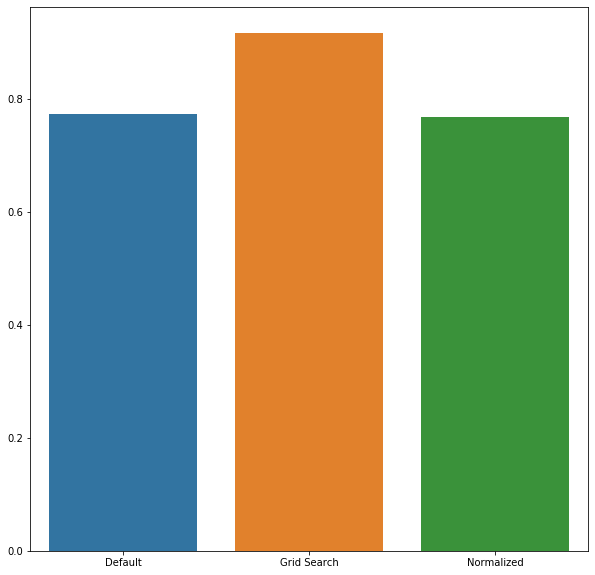

In [77]:
fig=plt.figure(figsize=(10,10))
point=['Default','Grid Search','Normalized']
recall_score=[default_recall,grid_recall,norm_recall]
sns.barplot(x=point, y=recall_score)

## Q21

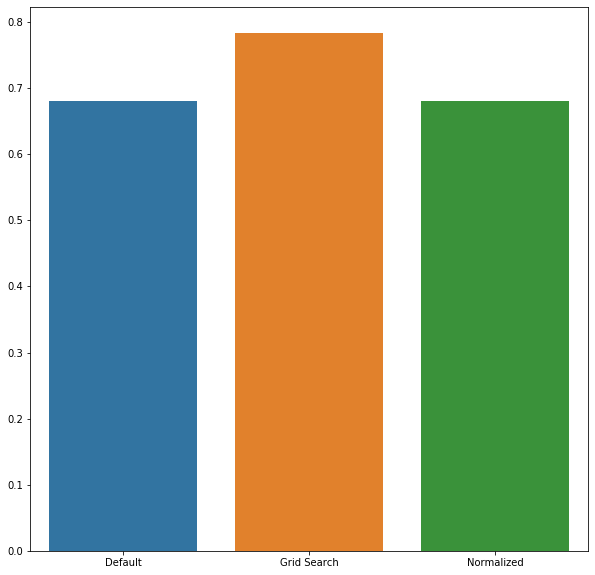

In [151]:
fig=plt.figure(figsize=(10,10))
point=['Default','Grid Search','Normalized']
acc_score=[default_acc,grid_acc,norm_acc]
sns.barplot(x=point, y=acc_score)

## Q22

In [161]:
min_max_scaler22=MinMaxScaler()
df_minmax22=min_max_scaler22.fit_transform(some_df)
df_minmax22

array([[0.85714286, 0.02941176, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.05357143, 0.64705882, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.53571429, 0.11764706, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.33928571, 0.11764706, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.07142857, 0.60294118, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.14285714, 0.60294118, 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [162]:
norm_some_df=pd.DataFrame(df_minmax22,columns=some_df.columns)
norm_some_df

,Age,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Saving accounts_unknown,Checking account_moderate,Checking account_rich,Checking account_unknown,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0.857143,0.029412,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.053571,0.647059,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.535714,0.117647,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.464286,0.558824,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.607143,0.294118,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.214286,0.117647,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
996,0.375000,0.382353,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.339286,0.117647,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
998,0.071429,0.602941,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [163]:
X_train,X_test,y_train,y_test=train_test_split(norm_some_df,
                                              df['Label'],
                                              test_size=0.3,
                                              random_state=99)

In [164]:
param_combination={'max_depth':[4,8,16,32,64], 'min_samples_leaf':[1,2,4,8,16]}
grid_search2=GridSearchCV(DecisionTreeClassifier(),param_combination,verbose=3)
grid_search2.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.664, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.721, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.657, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.671, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.750, total=   0.0s
[CV] max_depth=4, min_samples_leaf=2 .................................
[CV] ..... max_depth=4, min_samples_leaf=2, score=0.679, total=   0.0s
[CV] max_depth=4, min_samples_leaf=2 .................................
[CV] ..... max_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .... max_depth=16, min_samples_leaf=2, score=0.686, total=   0.0s
[CV] max_depth=16, min_samples_leaf=4 ................................
[CV] .... max_depth=16, min_samples_leaf=4, score=0.643, total=   0.0s
[CV] max_depth=16, min_samples_leaf=4 ................................
[CV] .... max_depth=16, min_samples_leaf=4, score=0.636, total=   0.0s
[CV] max_depth=16, min_samples_leaf=4 ................................
[CV] .... max_depth=16, min_samples_leaf=4, score=0.629, total=   0.0s
[CV] max_depth=16, min_samples_leaf=4 ................................
[CV] .... max_depth=16, min_samples_leaf=4, score=0.671, total=   0.0s
[CV] max_depth=16, min_samples_leaf=4 ................................
[CV] .... max_depth=16, min_samples_leaf=4, score=0.650, total=   0.0s
[CV] max_depth=16, min_samples_leaf=8 ................................
[CV] .... max_depth=16, min_samples_leaf=8, score=0.621, total=   0.0s
[CV] max_depth=16, min_samples_leaf=8 ................................
[CV] .

[CV] .... max_depth=64, min_samples_leaf=8, score=0.707, total=   0.0s
[CV] max_depth=64, min_samples_leaf=16 ...............................
[CV] ... max_depth=64, min_samples_leaf=16, score=0.664, total=   0.0s
[CV] max_depth=64, min_samples_leaf=16 ...............................
[CV] ... max_depth=64, min_samples_leaf=16, score=0.686, total=   0.0s
[CV] max_depth=64, min_samples_leaf=16 ...............................
[CV] ... max_depth=64, min_samples_leaf=16, score=0.693, total=   0.0s
[CV] max_depth=64, min_samples_leaf=16 ...............................
[CV] ... max_depth=64, min_samples_leaf=16, score=0.686, total=   0.0s
[CV] max_depth=64, min_samples_leaf=16 ...............................
[CV] ... max_depth=64, min_samples_leaf=16, score=0.714, total=   0.0s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 8, 16, 32, 64],
                 

In [165]:
grid_search2.best_params_

{'max_depth': 4, 'min_samples_leaf': 16}

In [166]:
grid_predicted=grid_search2.predict(X_test)

In [167]:
confusion_matrix(y_test,grid_predicted)

array([[ 13,  71],
       [  2, 214]], dtype=int64)

In [169]:
print('Accuracy=',accuracy_score(y_test,grid_predicted))
#print('F1 score=',f1_score(y_test,grid_predicted))
print('Precision=',precision_score(y_test,grid_predicted))
print('Recall=',recall_score(y_test,grid_predicted))

Accuracy= 0.7566666666666667
Precision= 0.7508771929824561
Recall= 0.9907407407407407
